## Importando dependencias.

In [1]:
import numpy as np
import pandas as pd
import random

from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE, RFECV
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc
from sklearn.decomposition import PCA
import missingno as msno
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import datasets

from varclushi import VarClusHi
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf
import plotly.graph_objects as go

from functools import reduce

cf.go_offline()
pd.set_option('display.max_columns',None)
print(pd.__version__)

2.2.2


## Cargando resultados del analisis de Churn

In [2]:
data = pd.read_csv(r'C:\Users\carlo\Syngenta\Projects for Analysis - General\Churn\Output\Churn_Prediction.csv')

data

,ID,y,Antiguedad,Tiempo_ultima_compra,Frec,Consumo,Compra_unica,Temporada,Devolucion,Ship_to,y^_lr,proba_lr,y^_knn,proba_knn,y^_rf,proba_rf,y^_MLP,proba_MLP,y^_last,proba_last
0,21109894,0,2475,89,93,11751084.15,False,OI,1,2,0,1.149193e-01,0,0.4,0,0.078138,0,1.775681e-01,0,0.067813
1,21113581,1,2475,496,2,1319400.52,False,OI,0,1,0,4.849288e-01,1,1.0,1,0.542515,1,8.802173e-01,1,0.688721
2,21338022,1,1580,519,4,678956.48,False,OI,0,1,1,5.181823e-01,1,1.0,1,0.558568,1,8.287279e-01,1,0.533133
3,21110068,1,2475,729,1,1244839.84,False,PV,0,1,1,5.468366e-01,1,1.0,1,0.903392,1,9.980584e-01,1,0.870578
4,21501025,0,1124,28,1258,14314645.29,False,PV,54,1,0,3.654699e-12,0,0.0,0,0.053068,0,9.019315e-08,0,0.002500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,21108962,1,2475,766,55,1790960.55,False,OI,0,1,0,1.766701e-01,1,0.8,1,0.570268,1,5.954532e-01,0,0.467494
382,21108107,0,2475,188,26,4202286.03,False,OI,2,1,0,3.002208e-01,1,0.6,1,0.672660,1,7.967930e-01,0,0.459200
383,21535330,0,783,123,25,444370.69,False,OI,1,1,0,3.450346e-01,0,0.4,0,0.091871,0,3.134516e-01,0,0.222193
384,21352533,0,1471,28,792,19827972.25,False,PV,6,2,0,5.171166e-08,0,0.0,0,0.028060,0,1.943977e-04,0,0.020069


Preparamos la data

In [3]:
data.rename(columns={'Tiempo_ultima_compra': 'Recency',
                    'Frec': 'Frequency',
                    'Consumo':'MonetaryValue'}, inplace=True)

In [4]:
var = ['Recency', 'Frequency', 'MonetaryValue']
ID = ['ID']

In [5]:
data = data[ID+var]

In [6]:
data[data['Frequency']==0]

,ID,Recency,Frequency,MonetaryValue


## Exploración de la información

In [7]:
data.describe()

,ID,Recency,Frequency,MonetaryValue
count,3.860000e+02,386.000000,386.000000,3.860000e+02
mean,2.122306e+07,200.797927,199.616580,2.548756e+07
std,1.416694e+05,249.985570,310.634388,6.257692e+07
min,2.110724e+07,28.000000,1.000000,0.000000e+00
25%,2.110816e+07,28.000000,24.000000,2.419696e+06
50%,2.110991e+07,60.000000,80.000000,7.803727e+06
75%,2.133936e+07,278.000000,252.000000,2.007867e+07
max,2.153533e+07,959.000000,3529.000000,8.222148e+08


In [8]:
# # Print the average values of the variables in the dataset
# print(data[ID+var].mean())

# # Print the standard deviation of the variables in the dataset
# print(data[ID+var].std())

# # Get the key statistics of the dataset
# print(data[ID+var].head())

In [9]:
# # Verificar si contiene infinitos
# infinitos_presentes = data.isin([np.inf, -np.inf])
# print(infinitos_presentes)

# # Contar el número de infinitos
# cantidad_infinitos = np.isinf(data).values.sum()
# print(f"El dataframe contiene {cantidad_infinitos} valores infinitos.")

C:\Users\carlo\AppData\Local\Temp\ipykernel_10176\2606715437.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\carlo\AppData\Local\Temp\ipykernel_10176\2606715437.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\carlo\AppData\Local\Temp\ipykernel_10176\2606715437.py:8: UserWarning:



`distplot` is

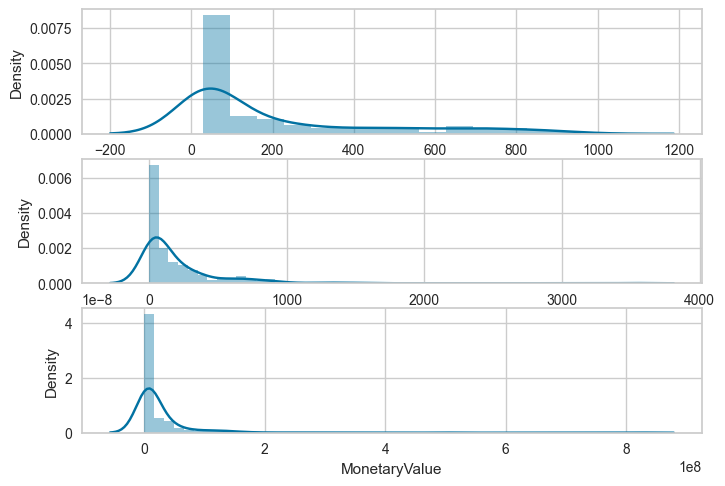

In [10]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])

# Show the plot
plt.show()

## Proceso de normalización de la información. Distribución normal

In [11]:
# Unskew the data
np.seterr(divide = 'ignore')
data['Recency_Log'] = np.where(data['Recency']>0, np.log(data['Recency']), 0)
data['Frequency_Log'] = np.where(data['Frequency']>0, np.log(data['Frequency']), 0)
data['MonetaryValue_Log'] = np.where(data['MonetaryValue']>0, np.log(data['MonetaryValue']), 0)

In [12]:
datamart_log = data[['Recency_Log', 'Frequency_Log', 'MonetaryValue_Log']]

In [13]:
# Normalizamos
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)

In [14]:
# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_log.index, columns=datamart_log.columns)

C:\Users\carlo\AppData\Local\Temp\ipykernel_10176\1517545167.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\carlo\AppData\Local\Temp\ipykernel_10176\1517545167.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\carlo\AppData\Local\Temp\ipykernel_10176\1517545167.py:8: UserWarning:



`distplot` is

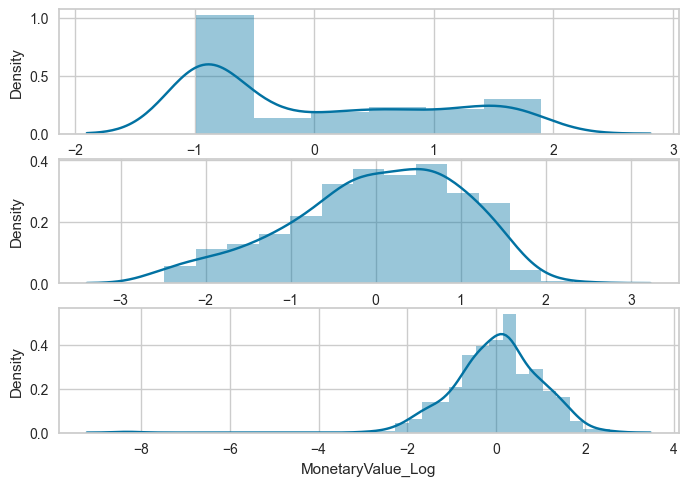

In [15]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency_Log'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency_Log'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue_Log'])

# Show the plot
plt.show()

## Implementación de Kmeans

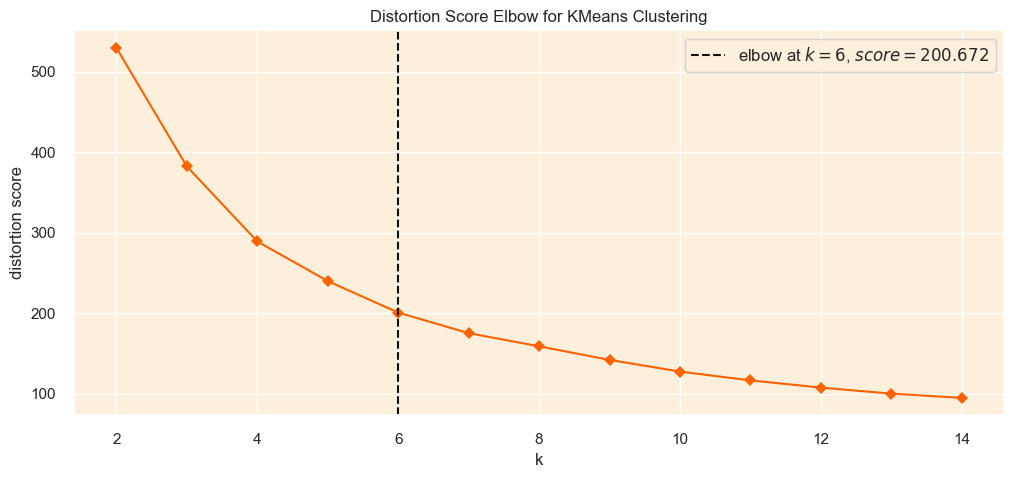

In [16]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(datamart_normalized)

# Finalize and render the figure
visualizer.show();

In [17]:
n_k=visualizer.elbow_value_

In [18]:
clus= AgglomerativeClustering(n_clusters=n_k, linkage="ward").fit(datamart_normalized)
clus

AgglomerativeClustering(n_clusters=6)

In [19]:
datamart_normalized

,Recency_Log,Frequency_Log,MonetaryValue_Log
0,-0.043909,0.180410,0.307431
1,1.360423,-2.076079,-0.849008
2,1.397476,-1.668709,-1.200354
3,1.675222,-2.483449,-0.879771
4,-0.989236,1.711208,0.411790
...,...,...,...
381,1.715692,-0.128295,-0.687410
382,0.567385,-0.568630,-0.236379
383,0.220575,-0.591680,-1.424526
384,-0.989236,1.439264,0.584090


In [20]:
md_h = clus.labels_
md_h

array([2, 0, 0, 0, 3, 2, 1, 0, 1, 3, 1, 3, 1, 5, 2, 0, 3, 5, 5, 2, 2, 1,
       5, 2, 3, 1, 2, 3, 0, 0, 0, 1, 2, 0, 3, 3, 1, 2, 1, 3, 3, 3, 2, 0,
       1, 0, 2, 3, 2, 2, 0, 2, 5, 2, 0, 3, 2, 0, 2, 5, 0, 2, 2, 3, 2, 0,
       5, 3, 2, 2, 2, 0, 2, 5, 3, 2, 5, 3, 0, 2, 0, 5, 5, 0, 2, 2, 0, 1,
       2, 5, 5, 3, 0, 1, 3, 1, 5, 3, 3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 5, 0,
       1, 5, 1, 1, 0, 2, 0, 1, 5, 3, 3, 3, 0, 2, 0, 1, 0, 5, 2, 1, 0, 1,
       0, 3, 5, 0, 5, 2, 3, 5, 1, 1, 5, 3, 1, 0, 2, 5, 0, 0, 1, 0, 3, 3,
       1, 3, 1, 5, 0, 2, 2, 0, 3, 3, 3, 1, 3, 0, 0, 3, 0, 2, 3, 3, 2, 1,
       1, 1, 3, 2, 1, 0, 0, 1, 2, 0, 0, 5, 3, 0, 3, 0, 0, 3, 3, 1, 3, 2,
       3, 0, 2, 1, 2, 1, 3, 0, 3, 4, 0, 3, 5, 3, 1, 0, 2, 0, 0, 0, 3, 3,
       3, 0, 3, 1, 2, 3, 3, 5, 2, 5, 5, 2, 1, 1, 2, 2, 1, 0, 2, 1, 3, 3,
       3, 0, 3, 0, 5, 3, 2, 0, 0, 0, 0, 3, 2, 2, 3, 3, 2, 3, 2, 1, 3, 5,
       0, 2, 3, 3, 3, 2, 2, 3, 5, 5, 2, 3, 2, 0, 3, 0, 5, 1, 1, 0, 2, 3,
       2, 1, 3, 0, 3, 1, 0, 1, 0, 3, 5, 1, 1, 5, 3,

Distribución de los clusters en el dataset

Text(0, 0.5, 'Número de clientes del cluster')

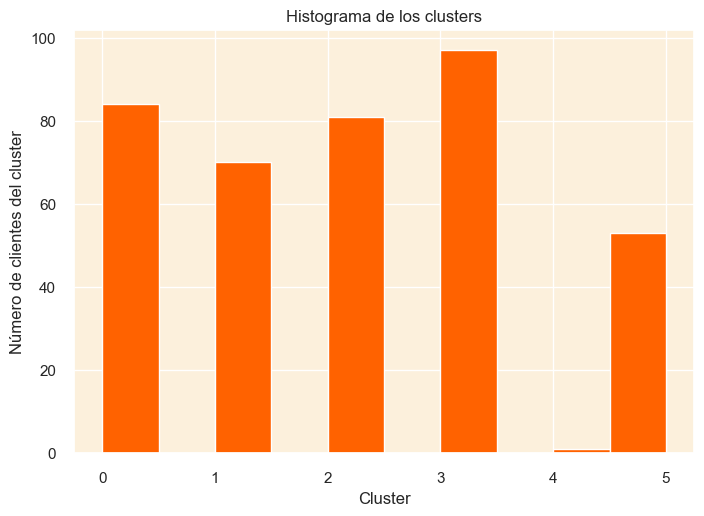

In [21]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de clientes del cluster")

In [22]:
columnas = ['ID']+var
data.columns

Index(['ID', 'Recency', 'Frequency', 'MonetaryValue', 'Recency_Log',
       'Frequency_Log', 'MonetaryValue_Log'],
      dtype='object')

In [23]:
# datamart_normalized = pd.DataFrame(datamart_normalized,
#                                     index=data.index,
#                                     columns=columnas)
datamart_normalized = datamart_normalized.assign(Cluster=md_h, CustomerID=data['ID'])
datamart_normalized

,Recency_Log,Frequency_Log,MonetaryValue_Log,Cluster,CustomerID
0,-0.043909,0.180410,0.307431,2,21109894
1,1.360423,-2.076079,-0.849008,0,21113581
2,1.397476,-1.668709,-1.200354,0,21338022
3,1.675222,-2.483449,-0.879771,0,21110068
4,-0.989236,1.711208,0.411790,3,21501025
...,...,...,...,...,...
381,1.715692,-0.128295,-0.687410,1,21108962
382,0.567385,-0.568630,-0.236379,1,21108107
383,0.220575,-0.591680,-1.424526,0,21535330
384,-0.989236,1.439264,0.584090,3,21352533


In [24]:
datamart_normalized.rename(columns={'Recency_Log': 'Recency',
                    'Frequency_Log': 'Frequency',
                    'MonetaryValue_Log':'MonetaryValue',
                    'ID':'CustomerID'}, inplace=True)
datamart_normalized[['Recency', 'Frequency', 'MonetaryValue']].mean()

Recency          5.522353e-17
Frequency        4.141765e-16
MonetaryValue   -3.451471e-16
dtype: float64

In [25]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                        var_name='Attribute',
                        value_name='Value') 

## Visualize a snake plot
Visualizamos las diferencias entre los segmentos de clientes encontrados.

<Axes: title={'center': 'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

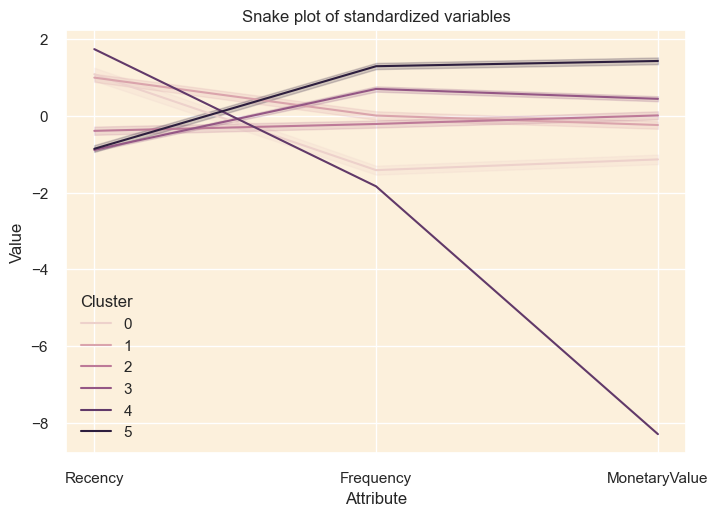

In [26]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)

In [27]:
# Create a cluster label column in the original DataFrame
datamart_rfm_k2 = datamart_normalized.assign(Cluster = md_h)

In [28]:
datamart_rfm_k2.groupby(['Cluster']).agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           1.0      -1.0          -1.0    84
1           1.0       0.0          -0.0    70
2          -0.0      -0.0           0.0    81
3          -1.0       1.0           0.0    97
4           2.0      -2.0          -8.0     1
5          -1.0       1.0           1.0    53

In [29]:
datamart_normalized = datamart_normalized[var+['Cluster']]

In [30]:
cluster_avg = datamart_normalized.groupby(['Cluster']).mean().round(2)
cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,1.09,-1.41,-1.13
1,1.00,0.01,-0.24
2,-0.39,-0.21,0.01
3,-0.89,0.70,0.45
4,1.74,-1.84,-8.30
5,-0.86,1.30,1.43


In [31]:
population_avg = data[var].mean().round(2)
population_avg

Recency               200.80
Frequency             199.62
MonetaryValue    25487558.05
dtype: float64

In [32]:
relative_imp = (cluster_avg / population_avg - 1).round(2)
relative_imp = relative_imp
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.99,-1.01,-1.0
1,-1.00,-1.00,-1.0
2,-1.00,-1.00,-1.0
3,-1.00,-1.00,-1.0
4,-0.99,-1.01,-1.0
5,-1.00,-0.99,-1.0


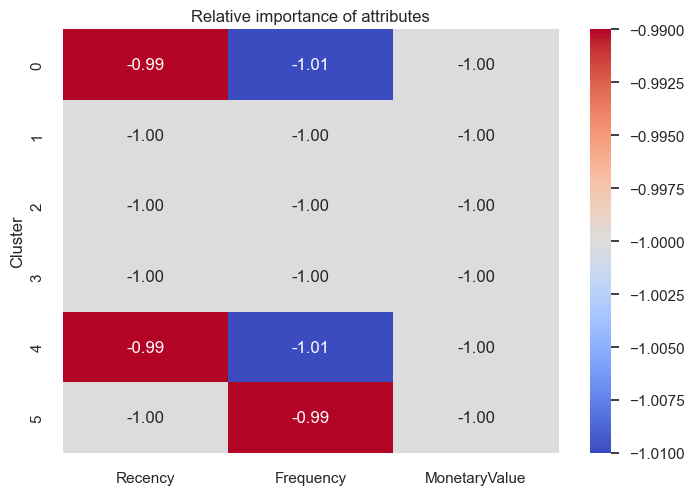

<Figure size 6500x4500 with 0 Axes>

In [33]:
# Plot heatmap
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='coolwarm')
plt.figure(figsize=(65, 45))
plt.show()

## Visualización de los resultados.

In [34]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [35]:
# Añade la columna CustomerID al dataframe datamart_normalized
datamart_normalized['ID'] = data['ID']

# Crea dataframes separados para cada clúster
cluster_0 = datamart_normalized[datamart_normalized['Cluster'] == 0]
cluster_1 = datamart_normalized[datamart_normalized['Cluster'] == 1]
cluster_2 = datamart_normalized[datamart_normalized['Cluster'] == 2]
cluster_3 = datamart_normalized[datamart_normalized['Cluster'] == 3]
cluster_4 = datamart_normalized[datamart_normalized['Cluster'] == 4]
cluster_5 = datamart_normalized[datamart_normalized['Cluster'] == 5]

# Crea una gráfica de dispersión 3D
fig = go.Figure()

# Agrega los puntos de datos para cada clúster y especifica el color
fig.add_trace(go.Scatter3d(x=cluster_0['Recency'], y=cluster_0['Frequency'], z=cluster_0['MonetaryValue'], 
                        mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['Recency'], y=cluster_1['Frequency'], z=cluster_1['MonetaryValue'], 
                        mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['Recency'], y=cluster_2['Frequency'], z=cluster_2['MonetaryValue'], 
                        mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=cluster_3['Recency'], y=cluster_3['Frequency'], z=cluster_3['MonetaryValue'], 
                        mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 3'))
fig.add_trace(go.Scatter3d(x=cluster_4['Recency'], y=cluster_4['Frequency'], z=cluster_4['MonetaryValue'], 
                        mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 4'))
fig.add_trace(go.Scatter3d(x=cluster_5['Recency'], y=cluster_5['Frequency'], z=cluster_5['MonetaryValue'], 
                        mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 5'))

# Configura el título y los detalles del diseño
fig.update_layout(
    title=dict(text='Visualización 3D de Clústeres de Clientes en el Espacio', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Recency'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Frequency'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='MonetaryValue'),
    ),
    width=900,
    height=800
)

# Muestra la gráfica
fig.show()


In [36]:
data

,ID,Recency,Frequency,MonetaryValue,Recency_Log,Frequency_Log,MonetaryValue_Log
0,21109894,89,93,11751084.15,4.488636,4.532599,16.279456
1,21113581,496,2,1319400.52,6.206576,0.693147,14.092688
2,21338022,519,4,678956.48,6.251904,1.386294,13.428312
3,21110068,729,1,1244839.84,6.591674,0.000000,14.034517
4,21501025,28,1258,14314645.29,3.332205,7.137278,16.476794
...,...,...,...,...,...,...,...
381,21108962,766,55,1790960.55,6.641182,4.007333,14.398263
382,21108107,188,26,4202286.03,5.236442,3.258097,15.251139
383,21535330,123,25,444370.69,4.812184,3.218876,13.004414
384,21352533,28,792,19827972.25,3.332205,6.674561,16.802604


In [37]:
datos_churn = pd.read_excel(r'C:\Users\carlo\Syngenta\Projects for Analysis - General\Data processing\Output\Customer_Churn.xlsx')
# datos = pd.read_csv("./Output/Customer_Churn1.csv")
datos_churn

,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,Ship_to,Devolucion,Consumo,Frec,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Compro,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra,Anio_Registro,Cliente_Nuevo,Antiguedad,percentile_75,Compra_unica,Churn
0,21480313,Coahuila de Zaragoza,A5642J,2021-05-14,SHOGUN 50% WS,OI,3CR,FG,2022-01-11,11/01/2022,1,0,313411.40,2,0,0,313411.40,0.00,1,0,0,-1.000000,959,2021,False,1201,302,False,True
1,21107558,Tamaulipas,A9582C,2017-11-17,PEAK,OI,3CR,HS,2022-01-24,10/01/2022,1,1,142999.76,1,0,0,142999.76,0.00,1,0,0,-1.000000,946,2017,False,2475,302,False,True
2,21334092,Jalisco,A5342F,2020-03-24,GRAMOXONE 20% WS,OI,3CR,HN,2022-02-10,10/02/2022,1,8,-299585.42,0,0,0,-299585.42,0.00,0,0,0,-1.000000,929,2020,False,1617,302,True,True
3,21218955,Michoacán de Ocampo,A9142I,2020-03-13,ENGEO,OI,3CR,HS,2022-02-18,17/01/2022,1,0,292567.56,5,0,0,292567.56,0.00,1,0,0,-1.000000,921,2020,False,1628,302,False,True
4,21109800,Estado de México,A5442A,2017-11-17,GESAPRIM AUTOSUSPENSIBLE 48% WS,OI,3CR,HS,2022-03-10,10/03/2022,1,0,280840.31,5,0,0,280840.31,0.00,1,0,0,-1.000000,901,2017,False,2475,302,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,21484876,Morelos,A9352F,2021-06-18,KIRIO,PV,3CR,IN,2024-07-30,02/08/2023,1,1,14968079.47,133,0,0,5703038.85,5479216.42,1,0,0,-0.039246,28,2021,False,1166,302,False,False
397,21486763,Chiapas,A5842E,2021-06-24,ELUMIS DUO,PV,3CR,IN,2024-07-30,04/01/2023,1,7,10495223.40,379,0,0,2474185.39,5203180.76,1,0,0,1.102987,28,2021,False,1160,302,False,False
398,21501025,Puebla,A9512C,2021-07-30,KIRIO,PV,3CR,HS,2024-07-30,02/02/2024,1,54,14314645.29,1258,0,0,4119812.21,6845064.74,1,0,0,0.661499,28,2021,False,1124,302,False,False
399,21502245,Puebla,A9512K,2021-08-06,KIRIO,PV,3CR,IN,2024-07-30,02/08/2023,1,3,10051591.92,640,0,0,1240296.54,4680778.61,1,0,0,2.773919,28,2021,False,1117,302,False,False


In [38]:
vard = ['Territorio',
        'Estado',
        'Cliente_Nuevo',
        'Anio_Registro',
        'Compra_unica',
        'Material.Number',
        'Temporada',
        'SO',
        'Churn',
        'Linea_Negocio'
    ]

varc = [
            'Antiguedad',
            # 'Volumen',
            'Consumo',
            # 'N_Material',
            # 'Ship_to',
            'Frec',
            'Tiempo_ultima_compra',
            'Devolucion',
            # 'Venta_2020',
            # 'Venta_2021',
            # 'Venta_2022',
            # 'Venta_2023',
            # 'Crecimiento_21vs20',
            # 'Crecimiento_22vs21',
            # 'Crecimiento_23vs22'
    ]

vart = ['y']
um = ['ID']

In [39]:
tu_dataframe = datos_churn

In [40]:
# Selecciona las columnas numéricas para normalizar
columnas_numericas = ['Antiguedad', 'Consumo', 'Frec', 'Tiempo_ultima_compra', 'Devolucion']

# Crea un objeto StandardScaler y ajusta a los datos
scaler = StandardScaler()
tu_dataframe[columnas_numericas] = scaler.fit_transform(tu_dataframe[columnas_numericas])

In [41]:
tu_dataframe[columnas_numericas]

,Antiguedad,Consumo,Frec,Tiempo_ultima_compra,Devolucion
0,-1.670683,-0.372217,-0.574692,2.987674,-0.408361
1,0.789492,-0.374498,-0.577443,2.936119,-0.342755
2,-0.867361,-0.380421,-0.580194,2.868702,0.116488
3,-0.846119,-0.372496,-0.566439,2.836976,-0.408361
4,0.789492,-0.372653,-0.566439,2.757661,-0.408361
...,...,...,...,...,...
396,-1.738271,-0.176080,-0.214319,-0.704428,-0.342755
397,-1.749857,-0.235944,0.462411,-0.704428,0.050882
398,-1.819375,-0.184825,2.880485,-0.704428,3.134366
399,-1.832893,-0.241882,1.180406,-0.704428,-0.211543


In [42]:
# Define los pesos (ajústalos según tu criterio)
w_antiguedad = 0.2
w_consumo = 0.3
w_frec = 0.1
w_tiempo_compra = 0.2
w_devolucion = 0.2

# Calcula el puntaje
tu_dataframe['Puntaje'] = (
    w_antiguedad * tu_dataframe['Antiguedad'] +
    w_consumo * tu_dataframe['Consumo'] +
    w_frec * tu_dataframe['Frec'] +
    w_tiempo_compra * tu_dataframe['Tiempo_ultima_compra'] -
    w_devolucion * tu_dataframe['Devolucion']
)

In [43]:
nuevo_dataframe = tu_dataframe[['bp_id', 'Puntaje']].copy()
nuevo_dataframe

,bp_id,Puntaje
0,21480313,0.175936
1,21107558,0.643580
2,21334092,0.204825
3,21218955,0.311451
4,21109800,0.622663
...,...,...
396,21484876,-0.494245
397,21486763,-0.525575
398,21501025,-0.899033
399,21502245,-0.419680


In [44]:
datos_churn['ID'] = datos_churn['bp_id']
datos_churn['y'] = datos_churn['Churn']
datos_churn = datos_churn[um+vart+varc+vard]
datos_churn

,ID,y,Antiguedad,Consumo,Frec,Tiempo_ultima_compra,Devolucion,Territorio,Estado,Cliente_Nuevo,Anio_Registro,Compra_unica,Material.Number,Temporada,SO,Churn,Linea_Negocio
0,21480313,True,-1.670683,-0.372217,-0.574692,2.987674,-0.408361,A5642J,Coahuila de Zaragoza,False,2021,False,SHOGUN 50% WS,OI,3CR,True,FG
1,21107558,True,0.789492,-0.374498,-0.577443,2.936119,-0.342755,A9582C,Tamaulipas,False,2017,False,PEAK,OI,3CR,True,HS
2,21334092,True,-0.867361,-0.380421,-0.580194,2.868702,0.116488,A5342F,Jalisco,False,2020,True,GRAMOXONE 20% WS,OI,3CR,True,HN
3,21218955,True,-0.846119,-0.372496,-0.566439,2.836976,-0.408361,A9142I,Michoacán de Ocampo,False,2020,False,ENGEO,OI,3CR,True,HS
4,21109800,True,0.789492,-0.372653,-0.566439,2.757661,-0.408361,A5442A,Estado de México,False,2017,False,GESAPRIM AUTOSUSPENSIBLE 48% WS,OI,3CR,True,HS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,21484876,False,-1.738271,-0.176080,-0.214319,-0.704428,-0.342755,A9352F,Morelos,False,2021,False,KIRIO,PV,3CR,False,IN
397,21486763,False,-1.749857,-0.235944,0.462411,-0.704428,0.050882,A5842E,Chiapas,False,2021,False,ELUMIS DUO,PV,3CR,False,IN
398,21501025,False,-1.819375,-0.184825,2.880485,-0.704428,3.134366,A9512C,Puebla,False,2021,False,KIRIO,PV,3CR,False,HS
399,21502245,False,-1.832893,-0.241882,1.180406,-0.704428,-0.211543,A9512K,Puebla,False,2021,False,KIRIO,PV,3CR,False,IN


In [45]:
datamart_normalized.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'Cluster', 'ID'], dtype='object')

In [46]:
datos_churn = datos_churn.merge(datamart_normalized, on = 'ID', how='left')
datos_churn

,ID,y,Antiguedad,Consumo,Frec,Tiempo_ultima_compra,Devolucion,Territorio,Estado,Cliente_Nuevo,Anio_Registro,Compra_unica,Material.Number,Temporada,SO,Churn,Linea_Negocio,Recency,Frequency,MonetaryValue,Cluster
0,21480313,True,-1.670683,-0.372217,-0.574692,2.987674,-0.408361,A5642J,Coahuila de Zaragoza,False,2021,False,SHOGUN 50% WS,OI,3CR,True,FG,1.899381,-2.076079,-1.609164,0.0
1,21107558,True,0.789492,-0.374498,-0.577443,2.936119,-0.342755,A9582C,Tamaulipas,False,2017,False,PEAK,OI,3CR,True,HS,1.888224,-2.483449,-2.024127,0.0
2,21334092,True,-0.867361,-0.380421,-0.580194,2.868702,0.116488,A5342F,Jalisco,False,2020,True,GRAMOXONE 20% WS,OI,3CR,True,HN,NaN,NaN,NaN,NaN
3,21218955,True,-0.846119,-0.372496,-0.566439,2.836976,-0.408361,A9142I,Michoacán de Ocampo,False,2020,False,ENGEO,OI,3CR,True,HS,1.866331,-1.537565,-1.645559,0.0
4,21109800,True,0.789492,-0.372653,-0.566439,2.757661,-0.408361,A5442A,Estado de México,False,2017,False,GESAPRIM AUTOSUSPENSIBLE 48% WS,OI,3CR,True,HS,1.848384,-1.537565,-1.667194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,21484876,False,-1.738271,-0.176080,-0.214319,-0.704428,-0.342755,A9352F,Morelos,False,2021,False,KIRIO,PV,3CR,False,IN,-0.989236,0.390663,0.435396,3.0
397,21486763,False,-1.749857,-0.235944,0.462411,-0.704428,0.050882,A5842E,Chiapas,False,2021,False,ELUMIS DUO,PV,3CR,False,IN,-0.989236,1.006107,0.247659,3.0
398,21501025,False,-1.819375,-0.184825,2.880485,-0.704428,3.134366,A9512C,Puebla,False,2021,False,KIRIO,PV,3CR,False,HS,-0.989236,1.711208,0.411790,3.0
399,21502245,False,-1.832893,-0.241882,1.180406,-0.704428,-0.211543,A9512K,Puebla,False,2021,False,KIRIO,PV,3CR,False,IN,-0.989236,1.314027,0.224819,3.0


Cargamos la información para su procesamiento en Qlik Sense.

In [47]:
Output_df = pd.read_csv(r'C:\Users\carlo\Syngenta\Projects for Analysis - General\Churn\Output\Churn_Prediction.csv')
Output_df = Output_df.merge(datamart_normalized, on = 'ID', how='left')
Output_df

,ID,y,Antiguedad,Tiempo_ultima_compra,Frec,Consumo,Compra_unica,Temporada,Devolucion,Ship_to,y^_lr,proba_lr,y^_knn,proba_knn,y^_rf,proba_rf,y^_MLP,proba_MLP,y^_last,proba_last,Recency,Frequency,MonetaryValue,Cluster
0,21109894,0,2475,89,93,11751084.15,False,OI,1,2,0,1.149193e-01,0,0.4,0,0.078138,0,1.775681e-01,0,0.067813,-0.043909,0.180410,0.307431,2
1,21113581,1,2475,496,2,1319400.52,False,OI,0,1,0,4.849288e-01,1,1.0,1,0.542515,1,8.802173e-01,1,0.688721,1.360423,-2.076079,-0.849008,0
2,21338022,1,1580,519,4,678956.48,False,OI,0,1,1,5.181823e-01,1,1.0,1,0.558568,1,8.287279e-01,1,0.533133,1.397476,-1.668709,-1.200354,0
3,21110068,1,2475,729,1,1244839.84,False,PV,0,1,1,5.468366e-01,1,1.0,1,0.903392,1,9.980584e-01,1,0.870578,1.675222,-2.483449,-0.879771,0
4,21501025,0,1124,28,1258,14314645.29,False,PV,54,1,0,3.654699e-12,0,0.0,0,0.053068,0,9.019315e-08,0,0.002500,-0.989236,1.711208,0.411790,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,21108962,1,2475,766,55,1790960.55,False,OI,0,1,0,1.766701e-01,1,0.8,1,0.570268,1,5.954532e-01,0,0.467494,1.715692,-0.128295,-0.687410,1
382,21108107,0,2475,188,26,4202286.03,False,OI,2,1,0,3.002208e-01,1,0.6,1,0.672660,1,7.967930e-01,0,0.459200,0.567385,-0.568630,-0.236379,1
383,21535330,0,783,123,25,444370.69,False,OI,1,1,0,3.450346e-01,0,0.4,0,0.091871,0,3.134516e-01,0,0.222193,0.220575,-0.591680,-1.424526,0
384,21352533,0,1471,28,792,19827972.25,False,PV,6,2,0,5.171166e-08,0,0.0,0,0.028060,0,1.943977e-04,0,0.020069,-0.989236,1.439264,0.584090,3


In [48]:
Output_df[['ID',
            'y',
            'Antiguedad',
            'Tiempo_ultima_compra',
            'Frec',
            'Consumo',
            'Devolucion',
            'Ship_to',
            'Compra_unica',
            'Temporada',
            'y^_lr',
            'proba_lr',
            'y^_knn',
            'proba_knn',
            'y^_rf',
            'proba_rf',
            'y^_MLP',
            'proba_MLP',
            'y^_last',
            'proba_last',
            'Recency',
            'Frequency',
            'MonetaryValue',
            'Cluster']].to_csv("./Output/Churn&Segmentation_Prediction.csv", index=False)

In [49]:
datos_churn = datos_churn.dropna()
datos_churn

,ID,y,Antiguedad,Consumo,Frec,Tiempo_ultima_compra,Devolucion,Territorio,Estado,Cliente_Nuevo,Anio_Registro,Compra_unica,Material.Number,Temporada,SO,Churn,Linea_Negocio,Recency,Frequency,MonetaryValue,Cluster
0,21480313,True,-1.670683,-0.372217,-0.574692,2.987674,-0.408361,A5642J,Coahuila de Zaragoza,False,2021,False,SHOGUN 50% WS,OI,3CR,True,FG,1.899381,-2.076079,-1.609164,0.0
1,21107558,True,0.789492,-0.374498,-0.577443,2.936119,-0.342755,A9582C,Tamaulipas,False,2017,False,PEAK,OI,3CR,True,HS,1.888224,-2.483449,-2.024127,0.0
3,21218955,True,-0.846119,-0.372496,-0.566439,2.836976,-0.408361,A9142I,Michoacán de Ocampo,False,2020,False,ENGEO,OI,3CR,True,HS,1.866331,-1.537565,-1.645559,0.0
4,21109800,True,0.789492,-0.372653,-0.566439,2.757661,-0.408361,A5442A,Estado de México,False,2017,False,GESAPRIM AUTOSUSPENSIBLE 48% WS,OI,3CR,True,HS,1.848384,-1.537565,-1.667194,0.0
5,21109659,True,0.789492,-0.372426,-0.566439,2.733867,-0.408361,A9572A,Baja California,False,2017,False,AMISTAR 50WG,OI,3CR,True,FG,1.842922,-1.537565,-1.636194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,21484876,False,-1.738271,-0.176080,-0.214319,-0.704428,-0.342755,A9352F,Morelos,False,2021,False,KIRIO,PV,3CR,False,IN,-0.989236,0.390663,0.435396,3.0
397,21486763,False,-1.749857,-0.235944,0.462411,-0.704428,0.050882,A5842E,Chiapas,False,2021,False,ELUMIS DUO,PV,3CR,False,IN,-0.989236,1.006107,0.247659,3.0
398,21501025,False,-1.819375,-0.184825,2.880485,-0.704428,3.134366,A9512C,Puebla,False,2021,False,KIRIO,PV,3CR,False,HS,-0.989236,1.711208,0.411790,3.0
399,21502245,False,-1.832893,-0.241882,1.180406,-0.704428,-0.211543,A9512K,Puebla,False,2021,False,KIRIO,PV,3CR,False,IN,-0.989236,1.314027,0.224819,3.0


In [50]:
varc.append('Cluster')

In [51]:
def generar_colores_aleatorios(n_k):
    """
    Genera una lista de códigos de colores aleatorios en formato hexadecimal.

    Args:
        n_k (int): Longitud deseada de la lista.

    Returns:
        list: Lista de códigos de colores aleatorios.
    """
    colores = []
    for _ in range(n_k):
        # Generar un color aleatorio en formato hexadecimal (#RRGGBB)
        color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        colores.append(color)
    return colores

colors = generar_colores_aleatorios(n_k)
print(colors)

['#f0af5f', '#4fa50d', '#e94f10', '#91b198', '#de9ac1', '#092015']


In [52]:
# Establecer 'CustomerID' como índice y asignarlo a un nuevo dataframe
df_customer = datos_churn[um + varc].set_index('ID')
df_customer

,Antiguedad,Consumo,Frec,Tiempo_ultima_compra,Devolucion,Cluster
ID,,,,,,
21480313,-1.670683,-0.372217,-0.574692,2.987674,-0.408361,0.0
21107558,0.789492,-0.374498,-0.577443,2.936119,-0.342755,0.0
21218955,-0.846119,-0.372496,-0.566439,2.836976,-0.408361,0.0
21109800,0.789492,-0.372653,-0.566439,2.757661,-0.408361,0.0
21109659,0.789492,-0.372426,-0.566439,2.733867,-0.408361,0.0
...,...,...,...,...,...,...
21484876,-1.738271,-0.176080,-0.214319,-0.704428,-0.342755,3.0
21486763,-1.749857,-0.235944,0.462411,-0.704428,0.050882,3.0
21501025,-1.819375,-0.184825,2.880485,-0.704428,3.134366,3.0


In [53]:
# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

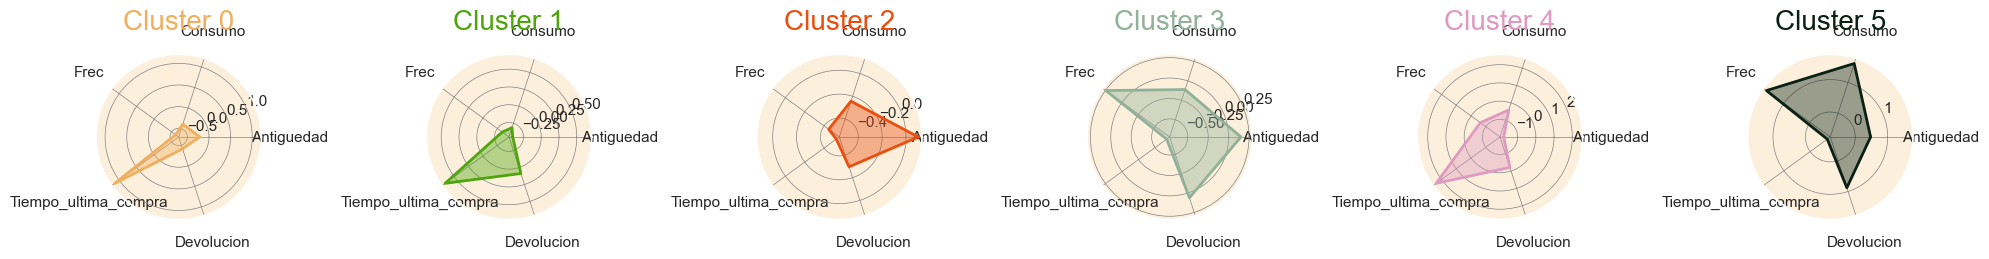

In [54]:
# Estandarizar los datos (excluyendo la columna de clusters)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['Cluster'], axis=1))

# Crear un nuevo dataframe con los valores estandarizados y agregar la columna de clusters
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['Cluster'] = df_customer['Cluster']

# Calcular los centroides de cada cluster
cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

# Configurar los datos para la gráfica de radar
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Inicializar la figura y los subplots
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=n_k)

# Crear gráficas de radar para cada cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Completar el bucle
    create_radar_chart(ax[i], angles, data, color, i)

    # Configurar etiquetas y agregar una cuadrícula
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])
    ax[i].grid(color='grey', linewidth=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()